In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

# Loading the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Preprocessing: Dropping the target column since it's a clustering problem
# In this case, we don't have an actual 'species' column as a part of the dataset itself,
# but the target variable (species) is stored separately in iris.target.
# So, we don't need to drop anything explicitly, but we'll ignore the target for clustering.
print("Dataset Loaded:")
df

Dataset Loaded:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
df.duplicated().sum()

1

In [5]:
df.drop_duplicates(inplace= True)

In [6]:
df.duplicated().sum()

0

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [9]:
# Generate descriptive statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.skew()

sepal length (cm)    0.312826
sepal width (cm)     0.307149
petal length (cm)   -0.263101
petal width (cm)    -0.090076
dtype: float64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

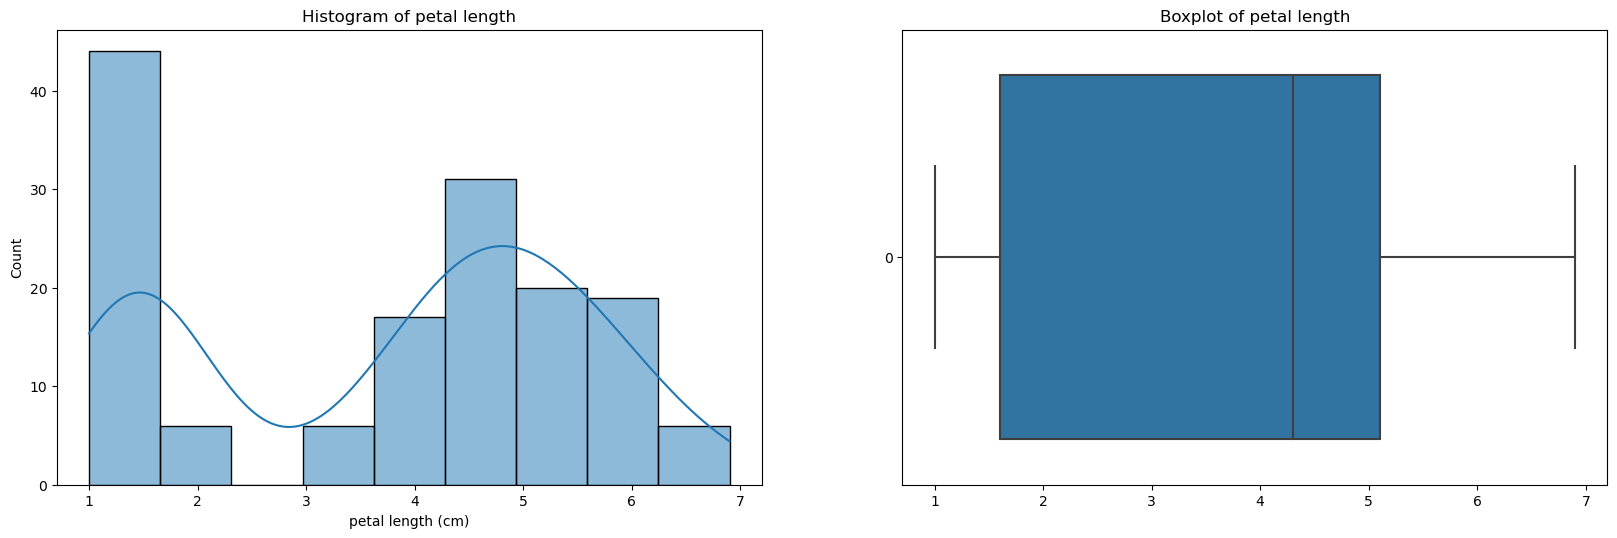

In [12]:

# Histogram
plt.figure(figsize=(20,13))
plt.subplot(2, 2, 1)
sns.histplot(df['petal length (cm)'], kde = True)
plt.title('Histogram of petal length')

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(df['petal length (cm)'], orient='h')
plt.title('Boxplot of petal length')
plt.show()

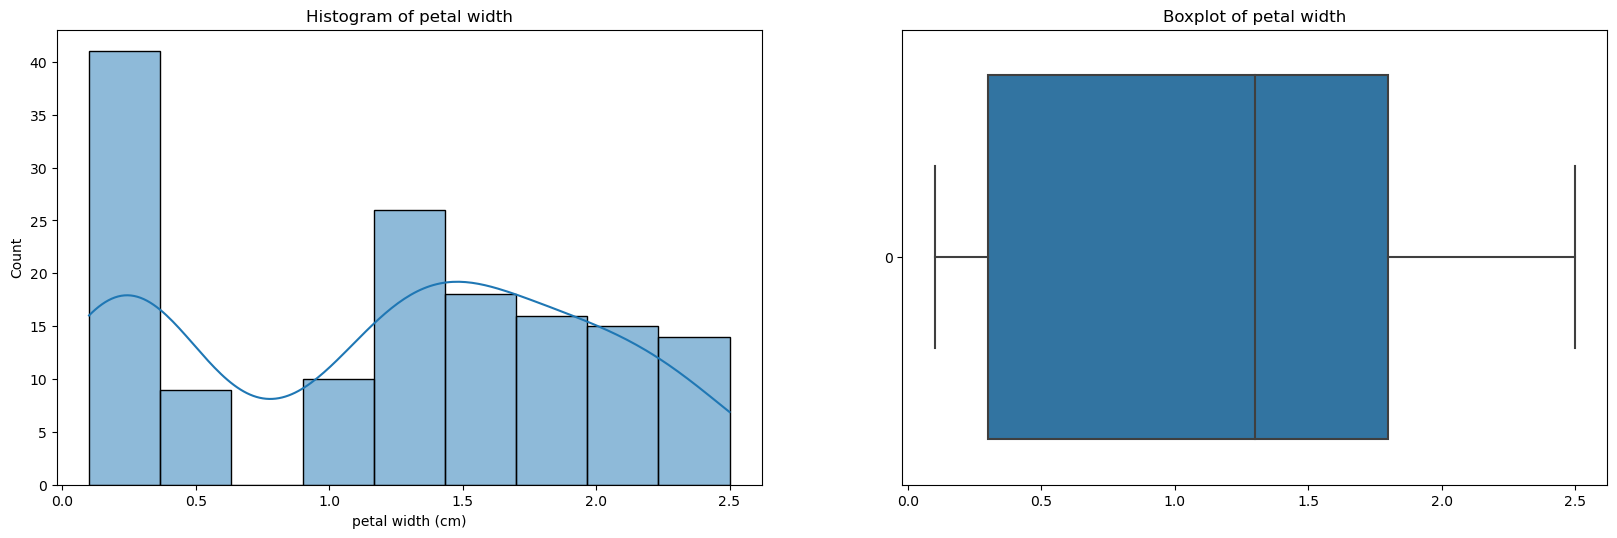

In [13]:

# Histogram
plt.figure(figsize=(20,13))
plt.subplot(2, 2, 1)
sns.histplot(df['petal width (cm)'], kde = True)
plt.title('Histogram of petal width')

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(df['petal width (cm)'], orient='h')
plt.title('Boxplot of petal width')
plt.show()

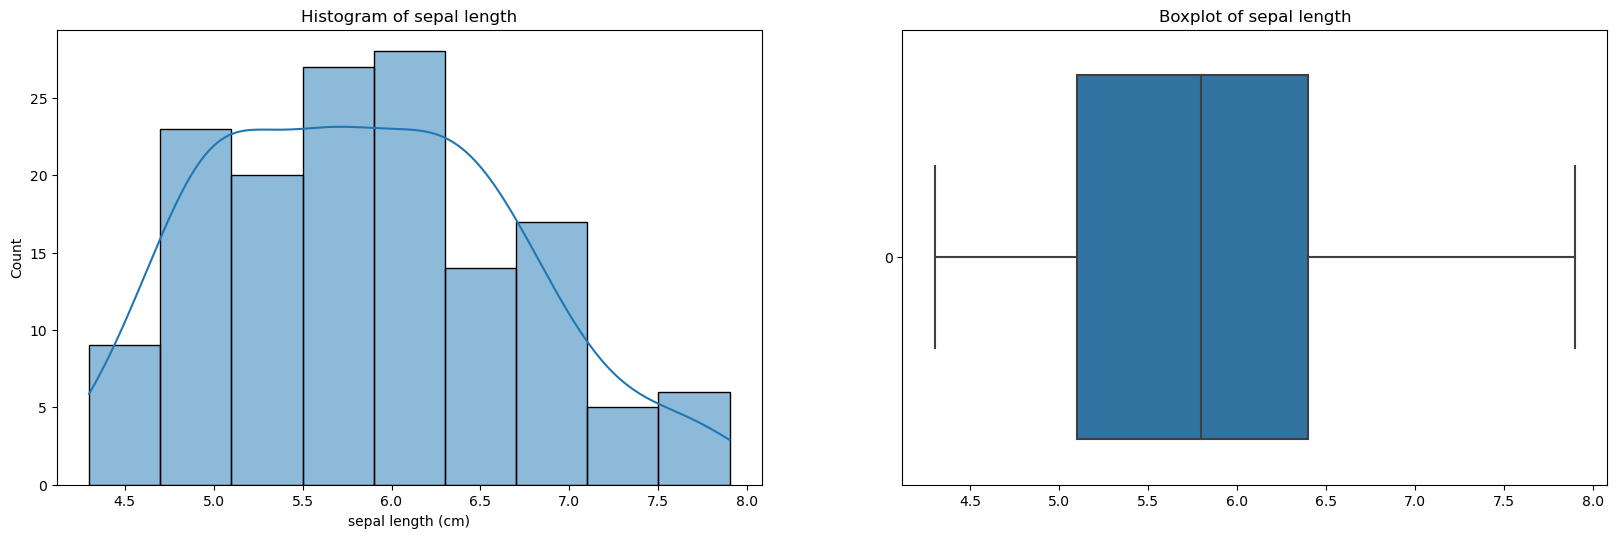

In [14]:

# Histogram
plt.figure(figsize=(20,13))
plt.subplot(2, 2, 1)
sns.histplot(df['sepal length (cm)'], kde = True)
plt.title('Histogram of sepal length')

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(df['sepal length (cm)'], orient='h')
plt.title('Boxplot of sepal length')
plt.show()

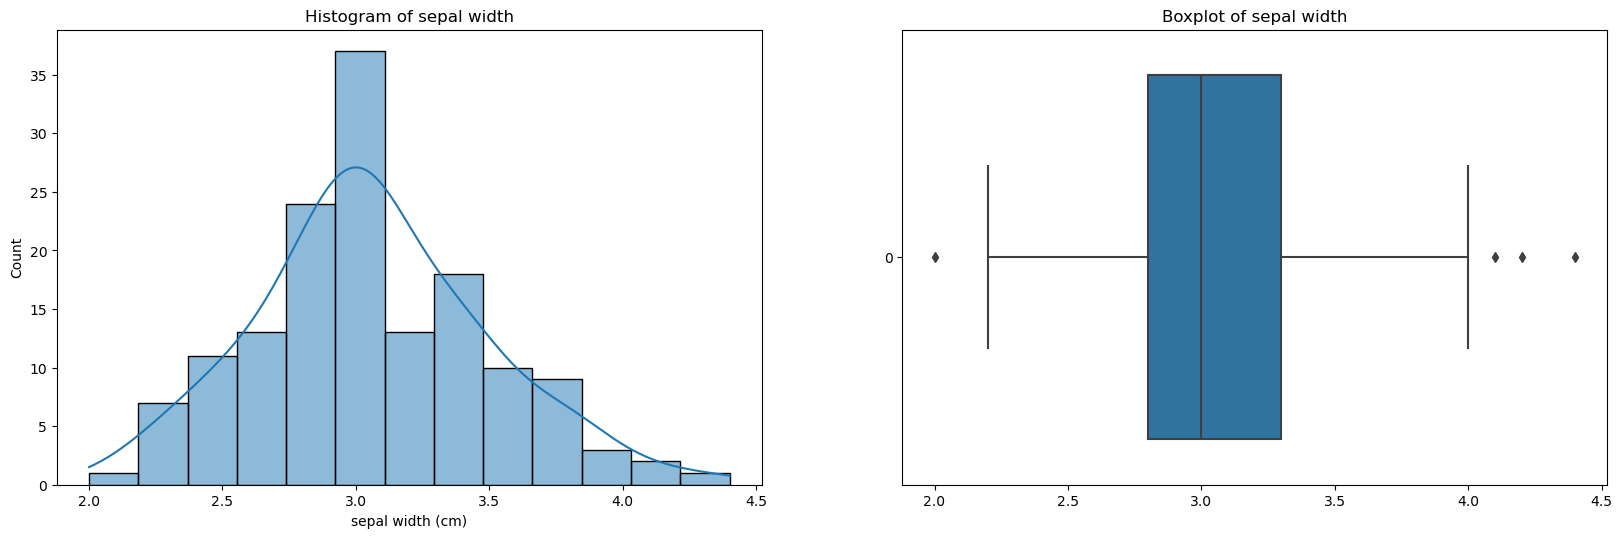

In [15]:
# Histogram
plt.figure(figsize=(20,13))
plt.subplot(2, 2, 1)
sns.histplot(df['sepal width (cm)'], kde = True)
plt.title('Histogram of sepal width')

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(df['sepal width (cm)'], orient='h')
plt.title('Boxplot of sepal width')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

In [17]:
scaled_x = st.fit_transform(df)

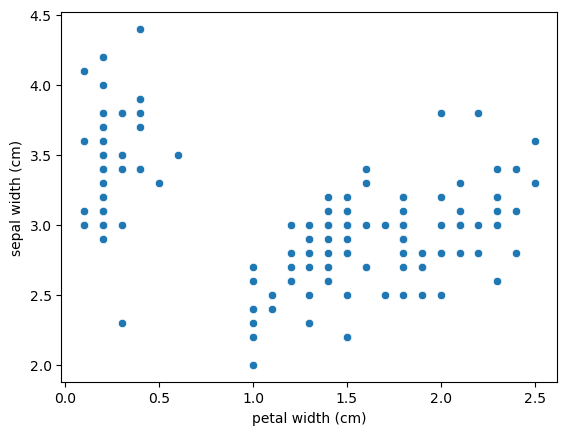

In [18]:
sns.scatterplot(x = df['petal width (cm)'], y = df['sepal width (cm)'])
plt.show()

In [19]:
df2 = df.copy() # Make a copy

In [20]:
from sklearn.cluster import KMeans

In [21]:
k_value= range(1,11)
gcss = []

for k in k_value:
    kmns = KMeans(n_clusters=k)
    kmns.fit(scaled_x)
    gcss.append(kmns.inertia_)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

In [22]:
gcss

[596.0,
 221.00912226442279,
 138.76870761038577,
 113.11583571210417,
 89.96335493837685,
 80.7635996238239,
 71.96384008810888,
 62.22270057005967,
 56.63233008329355,
 47.07787084419837]

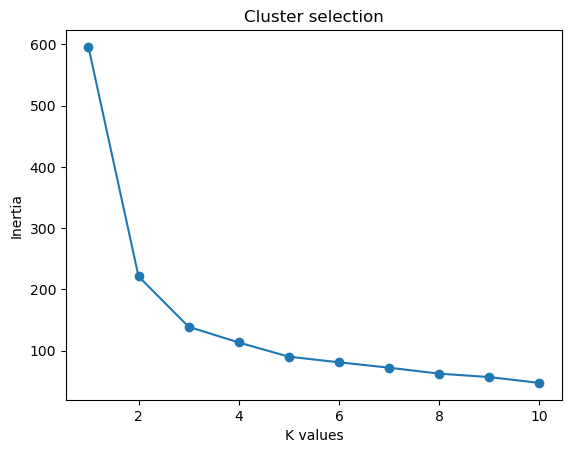

In [23]:
plt.plot(k_value,gcss,marker='o')
plt.title('Cluster selection')
plt.xlabel('K values')
plt.ylabel('Inertia')
plt.show()

## KMeans Clustering

KMeans Algorithm:
KMeans is a partitional clustering algorithm that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean. The algorithm iteratively assigns data points to clusters and updates the centroids until convergence.

The Iris dataset is well-suited for KMeans because it has distinct clusters corresponding to different species of flowers. Each flower species has different measurements, which makes it possible for KMeans to form compact clusters.

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


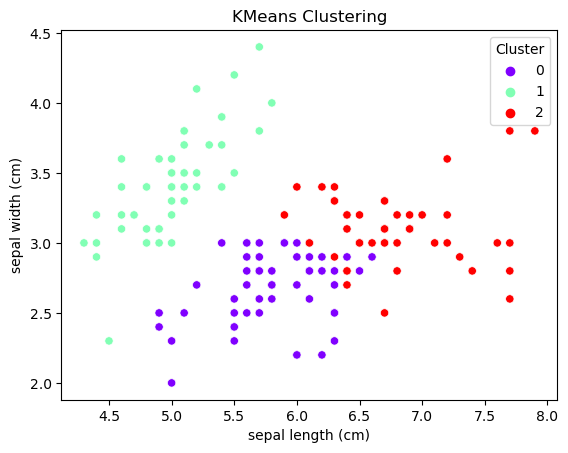

In [24]:
# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_x)

# Adding the cluster labels to the dataset
df['Cluster'] = kmeans.labels_

# Visualizing the clusters (We can visualize using a pairplot or scatter plot)
sns.scatterplot(x = df['sepal length (cm)'], y = df['sepal width (cm)'], hue= df['Cluster'], palette='rainbow')
plt.title("KMeans Clustering")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()


In [25]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Accuracy check

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
label = kmeans.labels_

In [28]:
silhouette_score(scaled_x, label)

0.46068122144785184

# Hierarchical Clustering

Hierarchical Clustering:

Hierarchical clustering builds a hierarchy of clusters either by using an agglomerative (bottom-up) or divisive (top-down) approach. In agglomerative clustering, each point starts as its own cluster, and clusters are successively merged until a stopping criterion is reached.


Hierarchical clustering is suitable for small datasets like Iris since it builds clusters step by step and can provide more insight into the structure of data. It also does not require a pre-specified number of clusters.

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


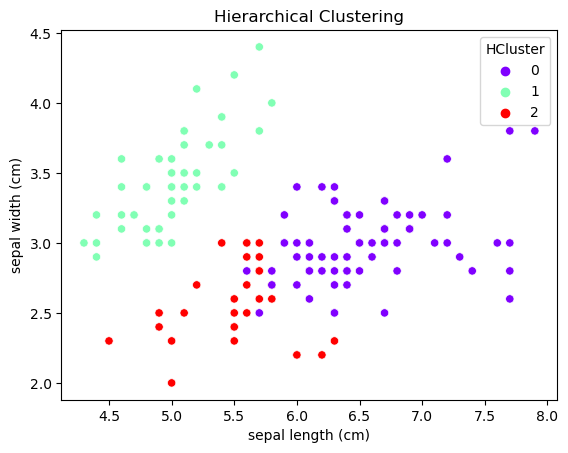

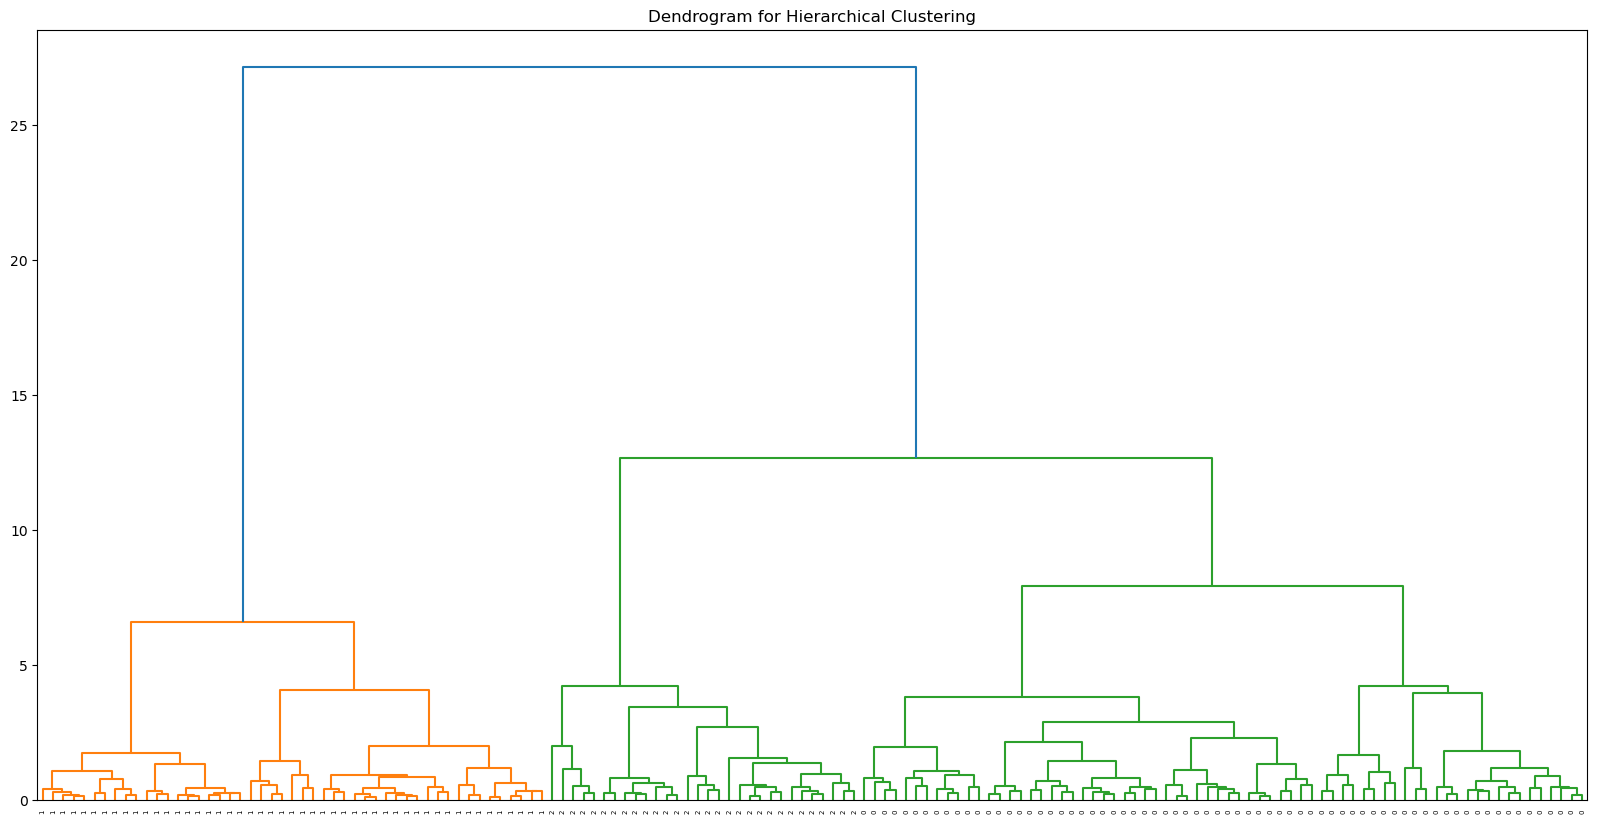

In [31]:
# Applying Agglomerative Hierarchical Clustering
agg_clust = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df['HCluster'] = agg_clust.fit_predict(scaled_x)

# Visualizing the Hierarchical clusters using a scatter plot
sns.scatterplot(x = df['sepal length (cm)'], y = df['sepal width (cm)'], hue= df['HCluster'], palette='rainbow')
plt.title("Hierarchical Clustering")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

# Creating a dendrogram for visualization
linked = linkage(scaled_x, method='ward')
plt.figure(figsize=(20, 10))
dendrogram(linked, labels=df['HCluster'].tolist())
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()
